In [10]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from types import *
from pprint import pprint

In [3]:
def summary_fn_image_percentile(x):
    return np.percentile(np.abs(x), 90, axis=range(len(x.shape)-1))

def summary_fn_image_l2(x):
    return np.linalg.norm(x, axis=tuple(range(1, len(x.shape)-1)), ord=2)

def summary_fn_image_threshold_mean(x):
    threshold = np.median(x, axis=tuple(range(1, len(x.shape)-1))) 
    return (x > threshold).sum(axis=tuple(range(1, len(x.shape)-1)))

# def summary_fn_image_threshold_median(x):
#     threshold = np.mean(x, axis=tuple(range(1, len(x.shape)-1)))
#     return (x > threshold).sum(axis=tuple(range(1, len(x.shape)-1)))

def summary_fn_image_mean(x):
    return np.mean(x, axis=tuple(range(1, len(x.shape)-1)))

def summary_fn_image_max(x):
    return np.max(x, axis=tuple(range(1, len(x.shape)-1)))

147.59137816047027 255.0 0.8540893272890385 0.0


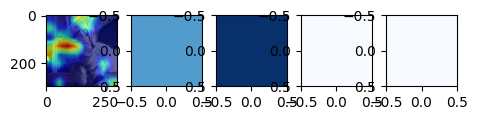

142.71876787146772 255.0 0.9071963567957538 0.0


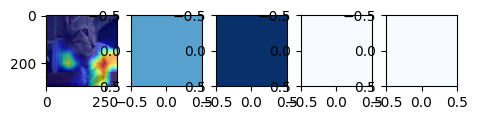

117.55219076854019 255.0 0.9552542905378377 0.0


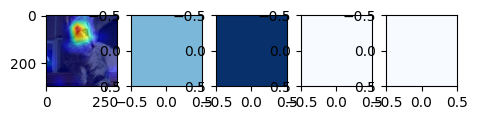

110.92075143551696 255.0 0.9191716847427133 0.0


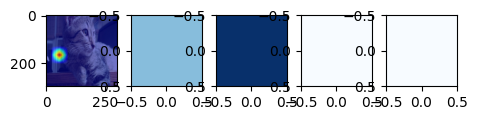

109.42438306029928 255.0 0.9390228364445843 0.0


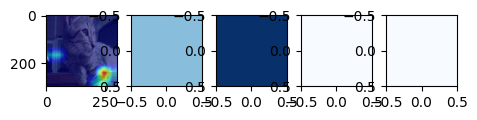

In [13]:
# load a png image as numpy array
img_path = '/home/insane/u/images/summerization'

for i in range(1, 6):
    im = Image.open(f'{img_path}/{i}.png')
    im = np.array(im)
    plt.subplot(161)
    plt.imshow(im)

    # convert to grayscale based on the intensity of blue and red
    gray = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
    # add batch and channel dimension
    gray = gray[np.newaxis, :, :, np.newaxis]

    # get L2-norm of the image
    l2 = summary_fn_image_l2(gray).item()
    # percentile = summary_fn_image_percentile(gray).item()
    threshold_mean = summary_fn_image_threshold_mean(gray).item()
    # threshold_median = summary_fn_image_threshold_median(gray).item()
    img_max = summary_fn_image_max(gray).item()
    img_mean = summary_fn_image_mean(gray).item()

    max_all = np.max([l2, threshold_mean, img_mean, img_max])
    min_all = np.min([l2, threshold_mean, img_mean, img_max])

    l2 = (l2 - min_all) / (max_all - min_all) * 255
    # percentile = (percentile - min_all) / (max_all - min_all) * 255
    threshold_mean = (threshold_mean - min_all) / (max_all - min_all) * 255
    # threshold_median = (threshold_median - min_all) / (max_all - min_all) * 255
    img_max = (img_max - min_all) / (max_all - min_all) * 255
    img_mean = (img_mean - min_all) / (max_all - min_all) * 255

    print(l2, threshold_mean, img_max, img_mean)

    # use d3 interploteBlue to get a color
    l2_color = plt.cm.Blues(int(l2))
    # percentile_color = plt.cm.Blues(int(percentile))
    threshold_mean_color = plt.cm.Blues(int(threshold_mean))
    # threshold_median_color = plt.cm.Blues(int(threshold_median))
    img_max_color = plt.cm.Blues(int(img_max))
    img_mean_color = plt.cm.Blues(int(img_mean))

    # show the color as image
    plt.subplot(162)
    plt.imshow([[l2_color]])

    # plt.subplot(163)
    # plt.imshow([[percentile_color]])

    plt.subplot(163)
    plt.imshow([[threshold_mean_color]])

    # plt.subplot(165)
    # plt.imshow([[threshold_median_color]])
    
    plt.subplot(164)
    plt.imshow([[img_max_color]])

    plt.subplot(165)
    plt.imshow([[img_mean_color]])
    
    plt.show()

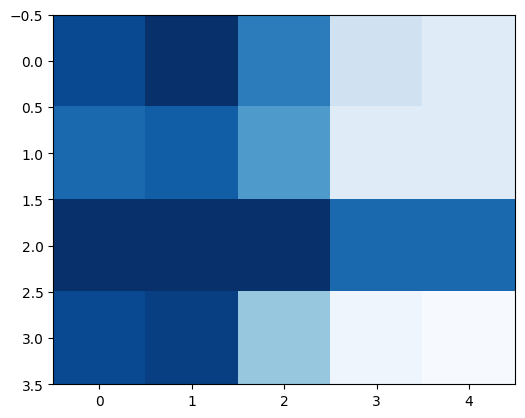

In [23]:
blues = [
    [230, 255, 180, 50, 30], 
    [200, 210, 150, 30, 30], 
    [255, 255, 255, 200, 200], 
    [230, 240, 100, 10, 1], 
]
plt.imshow([[plt.cm.Blues(i) for i in j] for j in blues])

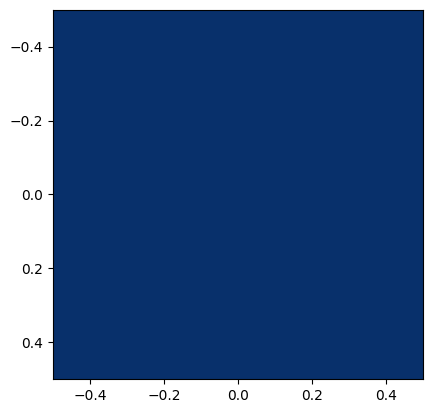

In [11]:
im = Image.open(f'{img_path}/2.png')
im = np.array(im)
gray = 0.299*im[:,:,0] + 0.587*im[:,:,1] + 0.114*im[:,:,2]
gray = gray.astype(np.uint8)
l2_norm = np.linalg.norm(gray)
